In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv")

In [3]:
df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [4]:
weather = pd.read_csv("https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv")

In [5]:
weather.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


Видно, что на каждый аэропорт приходится примерно поровну задержек:

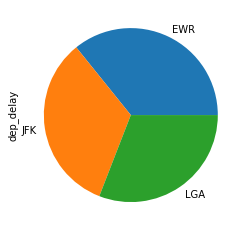

In [28]:
df.groupby('origin')['dep_delay'].count().plot.pie()

Месяцы с наибольшей средней задержкой - 6 и 7, причем задержка выше существенно, почти в 2 раза, при этом увеличения числа рейсов с эти месяцы не наблюдается

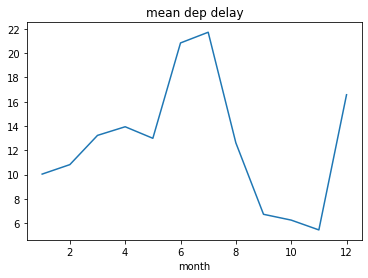

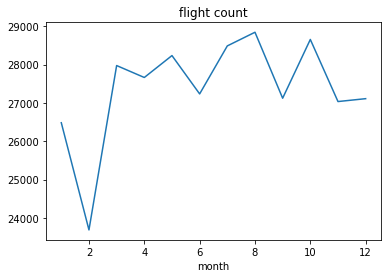

In [41]:
df.groupby('month')['dep_delay'].mean().plot()
plt.title("mean dep delay")
plt.show()
df.groupby('month')['dep_delay'].count().plot()
plt.title("flight count")
plt.show()

In [43]:
df['day_of_week'] = (df['day'] - 1) % 7 + 1

В случае с днями недели видна другая ситуация - средняя задержка падает вместе с количеством рейсов, максимальная задержка наблюдается в понедельник как и максимальное число рейсов.

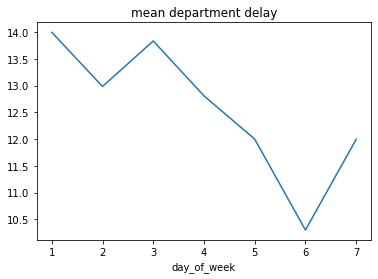

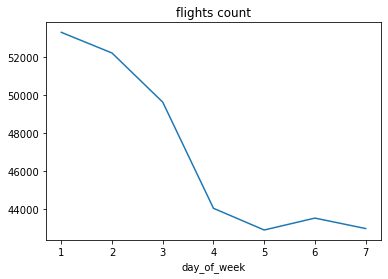

In [45]:
df.groupby('day_of_week')['dep_delay'].mean().plot()
plt.title("mean department delay")
plt.show()
df.groupby('day_of_week')['dep_delay'].count().plot()
plt.title("flights count")
plt.show()

Если рассмотреть среднюю задержку по часам, то видно, что она максимальна в период с 00 до 4 утра, и явной зависимости от количества рейсов не наблюдается.

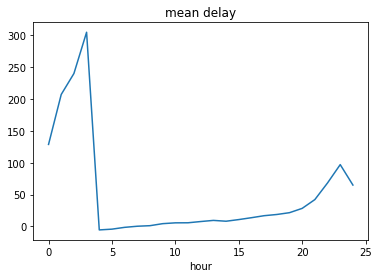

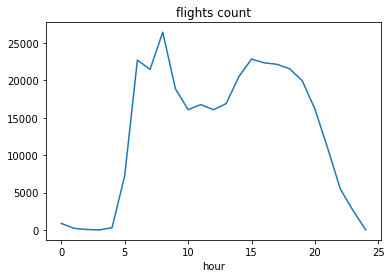

In [47]:
df.groupby('hour')['dep_delay'].mean().plot()
plt.title("mean delay")
plt.show()
df.groupby(['hour'])['dep_delay'].count().plot()
plt.title("flights count")
plt.show()

Таким образом, видно, что кроме понятного влияния количества рейсов на среднюю задержку, она растет в ночное время, что логично, ведь ночью работать сложнее, и в 6-7 и 12 месяцы.

In [67]:
mer = pd.merge(df, weather, on=['month', 'day', 'hour'])

In [68]:
mer['wind_speed'] = mer['wind_speed'].apply(lambda x: round(x, 1))

В данных по скорости ветра виден выброс - 1048.4, запишем в него среднюю скорость ветра

In [78]:
mer.groupby('wind_speed')['dep_delay'].mean()

wind_speed
0.0        8.204449
3.5        8.264770
4.6        8.874865
5.8        9.915538
6.9       12.705918
8.1       11.577893
9.2       13.417815
10.4      12.846056
11.5      14.409229
12.7      15.175612
13.8      16.574454
15.0      16.508508
16.1      18.555694
17.3      18.428133
18.4      15.498567
19.6      14.433815
20.7      17.686483
21.9      13.933810
23.0      15.935383
24.2      13.927213
25.3      18.722222
26.5      26.762215
27.6      17.022008
28.8      42.309322
29.9       8.074380
31.1      22.890625
32.2      24.148936
33.4      22.019355
34.5      80.641026
39.1      37.666667
40.3      12.320755
1048.4     3.205128
Name: dep_delay, dtype: float64

In [100]:
mer.loc[mer['wind_speed'] == np.max(mer['wind_speed'])] = np.mean(mer['wind_speed'])

Видно, что в среднем задержка растет с ростом скорости ветра

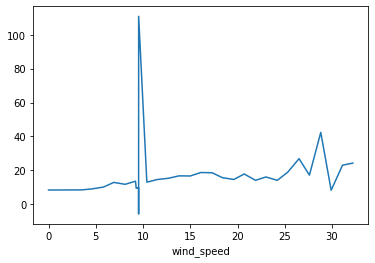

In [140]:
mer.groupby('wind_speed')['dep_delay'].mean().plot()

Явного влияния направления ветра на задержку не наблюдается:

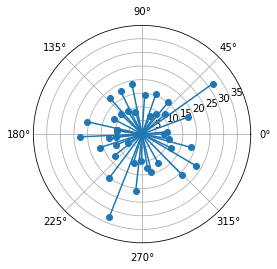

In [139]:
dels = mer.groupby("wind_dir", as_index = False)['dep_delay'].mean()
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.stem(dels['wind_dir'], dels['dep_delay'], use_line_collection = True)

In [149]:
mer['humid'] = mer['humid'].apply(lambda x: round(x, 0))

Видно, что наименьшая задержка наблюдается при средних значениях влажности, в то время как при очень маленьких и больших задержка возрастает

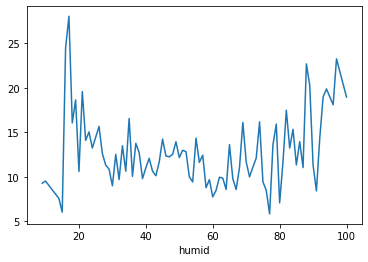

In [151]:
mer.groupby('humid')['dep_delay'].mean().plot()

Так же видно, что с ростом температуры растет средняя задержка:

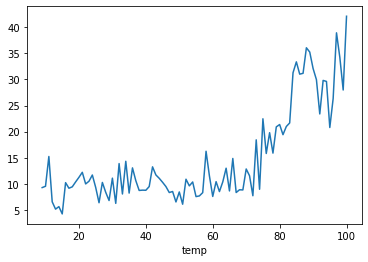

In [156]:
mer['temp'] = mer['temp'].apply(lambda x: round(x, 0))
mer.groupby('temp')['dep_delay'].mean().plot()

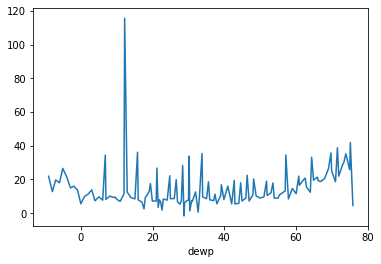

In [163]:
mer.groupby('dewp')['dep_delay'].mean().plot()